<a href="https://colab.research.google.com/github/ThinkSmartFast/AI-Driven-Linguistic-Analysis-of-Political-Speeches/blob/main/topics_of_speeches_Harris%2Cipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive

Enter JSON file name for visualization: Harris_all_speeches_results.json


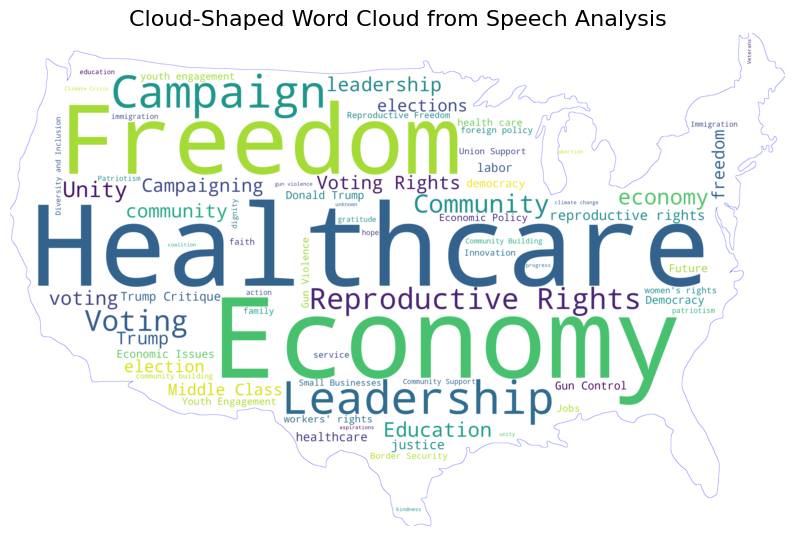

In [ ]:
import os
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
file_path = "/content/drive/My Drive/GenAI/"
os.chdir(file_path)

# Load the JSON data
file_path = input(f"\nEnter JSON file name for visualization: ")       #"Trump_all_speeches_results.json", "Harris_all_speeches_results.json"
with open(file_path, "r") as file:
    data = json.load(file)

# Combine word frequencies from multiple sections (e.g., Topics, Nouns, Adjectives)
word_frequencies = {}

# Add topics
word_frequencies.update(data.get("Topics", {}))

# Load the mask image for cloud shape
mask_path = "cloud_shape.png"  # Path to your cloud-shaped image
cloud_mask = np.array(Image.open(mask_path))

# Ensure the mask is binary (1 for the shape, 0 for background)
if cloud_mask.ndim == 3:  # If the image has color channels (e.g., RGB or RGBA)
    cloud_mask = cloud_mask[:, :, 0]  # Use only one channel (e.g., Red)
cloud_mask = np.where(cloud_mask > 128, 255, 0)  # Convert to binary mask

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=800,
    background_color="white",
    mask=cloud_mask,
    contour_width=1,
    contour_color="blue",
#    colormap="Blues"
).generate_from_frequencies(word_frequencies)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Turn off axis
plt.title("Cloud-Shaped Word Cloud from Speech Analysis", fontsize=16)
plt.show()